In [ ]:
import os
# Check if the kaggle.json file is in the correct location
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d jeffheaton/demand-forecasting-with-tabular-textual-images

Dataset URL: https://www.kaggle.com/datasets/jeffheaton/demand-forecasting-with-tabular-textual-images
License(s): CC-BY-SA-4.0
100% 126M/126M [00:08<00:00, 21.0MB/s]
100% 126M/126M [00:08<00:00, 16.0MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('/content/demand-forecasting-with-tabular-textual-images.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df_sales=pd.read_csv('/content/beach_demand_forecast/sales_train.csv')
df_restraunt=pd.read_csv('/content/beach_demand_forecast/resturants.csv')
df_items=pd.read_csv('/content/beach_demand_forecast/items.csv')

In [ ]:
df_sales

,date,item_id,price,item_count
0,2019-01-01,3,29.22,2.0
1,2019-01-01,4,26.42,22.0
2,2019-01-01,12,4.87,7.0
3,2019-01-01,13,4.18,12.0
4,2019-01-01,16,3.21,136.0
...,...,...,...,...
109595,2021-12-31,96,21.93,0.0
109596,2021-12-31,97,28.65,0.0
109597,2021-12-31,98,5.00,0.0
109598,2021-12-31,99,5.32,0.0


In [ ]:
df_sales['date'] = pd.to_datetime(df_sales['date'],errors='coerce')

In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        109600 non-null  datetime64[ns]
 1   item_id     109600 non-null  int64         
 2   price       109600 non-null  float64       
 3   item_count  109600 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 3.3 MB


In [ ]:
df_sales['weekdays']=df_sales['date'].dt.day_name()

In [ ]:
start_date=df_sales['date'].min()
end_date=df_sales['date'].max()

In [ ]:
df_sales['week']=((df_sales.date - start_date).dt.days/7).astype(int)

In [ ]:
df_sales

,date,item_id,price,item_count,weekdays,week
0,2019-01-01,3,29.22,2.0,Tuesday,0
1,2019-01-01,4,26.42,22.0,Tuesday,0
2,2019-01-01,12,4.87,7.0,Tuesday,0
3,2019-01-01,13,4.18,12.0,Tuesday,0
4,2019-01-01,16,3.21,136.0,Tuesday,0
...,...,...,...,...,...,...
109595,2021-12-31,96,21.93,0.0,Friday,156
109596,2021-12-31,97,28.65,0.0,Friday,156
109597,2021-12-31,98,5.00,0.0,Friday,156
109598,2021-12-31,99,5.32,0.0,Friday,156


In [ ]:
import plotly.express as px
df_plot = df_sales[['date','item_count']].groupby(['date']).sum().reset_index()

In [ ]:
fig = px.line(df_plot, x="date", y="item_count", title='Total Sales by Date')
fig.show()

In [ ]:
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

df_plot = df_sales[['weekdays','item_count']].groupby(['weekdays']).sum().reset_index()

In [ ]:
df_plot

,weekdays,item_count
0,Friday,136300.0
1,Monday,70112.0
2,Saturday,135644.0
3,Sunday,68032.0
4,Thursday,116947.0
5,Tuesday,79454.0
6,Wednesday,88298.0


In [ ]:
df_plot=df_plot.set_index('weekdays').loc[day_order].reset_index()

In [ ]:
fig=px.bar(df_plot,x='weekdays',y='item_count',title='Total Sales by Day of Week')
fig.show()

In [ ]:
SINGLE_YEAR=2020
df_sales_2020=df_sales[df_sales['date'].dt.year==SINGLE_YEAR]
df_plot=df_sales_2020[['date','item_count']].groupby('date').sum().reset_index()

In [ ]:
fig=px.bar(df_plot,x='date',y='item_count',facet_col_spacing=0,title=f'Total sales by Day {SINGLE_YEAR}')
fig.show()

In [ ]:
df_sales['item_id'].unique()

array([  3,   4,  12,  13,  16,  19,  21,  23,  27,  35,  42,  45,  56,
        59,  67,  73,  75,  76,  90,  91,  93,   1,   2,   5,   6,   7,
         8,   9,  10,  11,  14,  15,  17,  18,  20,  22,  24,  25,  26,
        28,  29,  30,  31,  32,  33,  34,  36,  37,  38,  39,  40,  41,
        43,  44,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  57,
        58,  60,  61,  62,  63,  64,  65,  66,  68,  69,  70,  71,  72,
        74,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  92,  94,  95,  96,  97,  98,  99, 100])

In [ ]:
# sales of items by item id
df2=df_sales[['item_id','item_count']].groupby(['item_id']).sum().reset_index().sort_values('item_id',ascending=True)

In [ ]:
df_items2=df_items[['id','name']]
df_items2.columns=['item_id','name']
df_popular= df2.merge(df_items2)
df_popular

,item_id,item_count,name
0,1,1.0,Chocolate Cake
1,2,4.0,Breaded Fish with Vegetables Meal
2,3,2946.0,Sweet Fruity Cake
3,4,34439.0,Amazing Steak Dinner with Rolls
4,5,17.0,Milk Cake
...,...,...,...
95,96,15.0,Blue Ribbon Fish with Bread Lunch
96,97,141.0,Original Fruity Cod with Bread and Vegetables ...
97,98,0.0,Original Sweet Milky Soft Drink
98,99,28.0,Frozen Tomato Soft Drink


In [ ]:
fig=px.bar(df_popular,x='name',y='item_count',title='Popular Items')
fig.update_layout(bargap=0.0,bargroupgap=0.0)
fig.show()

In [ ]:
df_plot=df_sales_2020[['date','item_count','item_id']].groupby(['date','item_id']).sum().reset_index()
df_plot= df_plot.merge(df_items,left_on="item_id",right_on="id")
df_plot=df_plot[['date','item_count','name']]
fig = px.bar(df_plot, x='date', y='item_count',color="name", title=f'Item Sales by Date - {SINGLE_YEAR}')
fig.show()

In [ ]:
df_plot=df_sales_2020[['item_id','week','item_count']].groupby(['week','item_id']).sum().reset_index()
df_plot=df_plot.merge(df_items,left_on="item_id",right_on="id")
df_plot=df_plot[['week','item_count','name']]
fig = px.bar(df_plot, x='week', y='item_count',color="name", title=f'Item Sales by Week - {SINGLE_YEAR}')
fig.show()

In [ ]:
df_sales

,date,item_id,price,item_count,weekdays,week
0,2019-01-01,3,29.22,2.0,Tuesday,0
1,2019-01-01,4,26.42,22.0,Tuesday,0
2,2019-01-01,12,4.87,7.0,Tuesday,0
3,2019-01-01,13,4.18,12.0,Tuesday,0
4,2019-01-01,16,3.21,136.0,Tuesday,0
...,...,...,...,...,...,...
109595,2021-12-31,96,21.93,0.0,Friday,156
109596,2021-12-31,97,28.65,0.0,Friday,156
109597,2021-12-31,98,5.00,0.0,Friday,156
109598,2021-12-31,99,5.32,0.0,Friday,156


In [ ]:
df_plot =df_sales[['item_id','weekdays','item_count']].groupby(['item_id','weekdays']).sum().reset_index()
df_plot = df_plot.set_index('weekdays').loc[day_order].reset_index()
df_plot = df_plot.merge(df_items,left_on="item_id",right_on="id")[['weekdays','item_count','name']]
fig = px.bar(df_plot, x='weekdays', y='item_count',color="name", title=f'Total Sales by Day of Week - {SINGLE_YEAR}')
fig.update_layout(bargap=0.0,bargroupgap=0.0)
fig.show()

In [ ]:
 def series_to_supervised(data,window=1,lag=1,dropnan=True):
  cols,names=list(),list()
  # Input sequence (t-n, ... t-1)
  # loop that iterates over a range of values in descending order, starting from window and ending just before 0.
  for i in range(window,0,-1):
    cols.append(data.shift(i))
    names+=[('%s(t-%d)'%(col,i)) for col in data.columns]

  # current timestamp (t=0)
  cols.append(data)
  names+=['%s(t)'%col for col in data.columns]

  # target timestamp (t=lag)
  cols.append(data.shift(-lag))
  names+=['%s(t+%d)'%(col,lag) for col in data.columns]

  # put it all together
  agg=pd.concat(cols,axis=1)
  agg.columns=names

  if dropnan:
    agg.dropna(inplace=True)
  return agg

In [ ]:
df_items2=df_items[['id','store_id']]
df_train=df_sales.merge(df_items2,left_on='item_id',right_on='id')
df_train[['date','item_id','item_count','store_id']]
df_train=df_train.sort_values('date').groupby(['item_id', 'store_id', 'date'], as_index=False).agg({'item_count':['mean']})
df_train.columns = ['item', 'store', 'date', 'sales']
df_train
# Computes daily average sales for each item at each store

,item,store,date,sales
0,1,4,2019-01-01,0.0
1,1,4,2019-01-02,0.0
2,1,4,2019-01-03,0.0
3,1,4,2019-01-04,0.0
4,1,4,2019-01-05,0.0
...,...,...,...,...
109595,100,2,2021-12-27,0.0
109596,100,2,2021-12-28,0.0
109597,100,2,2021-12-29,0.0
109598,100,2,2021-12-30,0.0


In [ ]:
window = 29
future_span = 30
series = series_to_supervised(df_train.drop('date', axis=1), window=window, lag=future_span)
series.head()

,item(t-29),store(t-29),sales(t-29),item(t-28),store(t-28),sales(t-28),item(t-27),store(t-27),sales(t-27),item(t-26),...,sales(t-2),item(t-1),store(t-1),sales(t-1),item(t),store(t),sales(t),item(t+30),store(t+30),sales(t+30)
29,1.0,4.0,0.0,1.0,4.0,0.0,1.0,4.0,0.0,1.0,...,0.0,1.0,4.0,0.0,1,4,0.0,1.0,4.0,0.0
30,1.0,4.0,0.0,1.0,4.0,0.0,1.0,4.0,0.0,1.0,...,0.0,1.0,4.0,0.0,1,4,0.0,1.0,4.0,0.0
31,1.0,4.0,0.0,1.0,4.0,0.0,1.0,4.0,0.0,1.0,...,0.0,1.0,4.0,0.0,1,4,0.0,1.0,4.0,0.0
32,1.0,4.0,0.0,1.0,4.0,0.0,1.0,4.0,0.0,1.0,...,0.0,1.0,4.0,0.0,1,4,0.0,1.0,4.0,0.0
33,1.0,4.0,0.0,1.0,4.0,0.0,1.0,4.0,0.0,1.0,...,0.0,1.0,4.0,0.0,1,4,0.0,1.0,4.0,0.0


In [ ]:
last_item= 'item(t-%d)'% window
last_store= 'store(t-%d)'% window

series=series[series['store(t)']== series[last_store]]
series=series[series['item(t)']==series[last_item]]

In [ ]:
columns_to_drop=[('%s(t+%d)'% (col,future_span)) for col in ['item','store']]

for i in range(window,0,-1):
  columns_to_drop+=['%s(t-%d)'%(col,i) for col in ['item','store']]

In [ ]:
series.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
series.drop(['item(t)', 'store(t)'], axis=1, inplace=True)

In [ ]:
labels_col = 'sales(t+%d)' % future_span
labels = series[labels_col]
series = series.drop(labels_col, axis=1)

In [ ]:
series.columns

Index(['sales(t-29)', 'sales(t-28)', 'sales(t-27)', 'sales(t-26)',
       'sales(t-25)', 'sales(t-24)', 'sales(t-23)', 'sales(t-22)',
       'sales(t-21)', 'sales(t-20)', 'sales(t-19)', 'sales(t-18)',
       'sales(t-17)', 'sales(t-16)', 'sales(t-15)', 'sales(t-14)',
       'sales(t-13)', 'sales(t-12)', 'sales(t-11)', 'sales(t-10)',
       'sales(t-9)', 'sales(t-8)', 'sales(t-7)', 'sales(t-6)', 'sales(t-5)',
       'sales(t-4)', 'sales(t-3)', 'sales(t-2)', 'sales(t-1)', 'sales(t)'],
      dtype='object')

In [ ]:
series

,sales(t-29),sales(t-28),sales(t-27),sales(t-26),sales(t-25),sales(t-24),sales(t-23),sales(t-22),sales(t-21),sales(t-20),...,sales(t-9),sales(t-8),sales(t-7),sales(t-6),sales(t-5),sales(t-4),sales(t-3),sales(t-2),sales(t-1),sales(t)
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_valid,Y_train,Y_valid=train_test_split(series,labels.values,test_size=0.4,random_state=101)

In [ ]:
X_train.shape,X_valid.shape

((64002, 30), (42668, 30))

In [ ]:
X_train.head()

,sales(t-29),sales(t-28),sales(t-27),sales(t-26),sales(t-25),sales(t-24),sales(t-23),sales(t-22),sales(t-21),sales(t-20),...,sales(t-9),sales(t-8),sales(t-7),sales(t-6),sales(t-5),sales(t-4),sales(t-3),sales(t-2),sales(t-1),sales(t)
49597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47781,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
98026,2.0,2.0,1.0,4.0,4.0,0.0,2.0,0.0,2.0,1.0,...,2.0,1.0,0.0,2.0,0.0,4.0,1.0,2.0,1.0,1.0
69860,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25351,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from keras.layers import Dense,TimeDistributed,Flatten,Dropout
from keras.models import Sequential,Model

In [ ]:
epochs=500
batch_size=256
lr=0.0002
adam=tf.keras.optimizers.Adam(lr)

In [ ]:
X_train_series = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_valid_series = X_valid.values.reshape((X_valid.shape[0], X_valid.shape[1], 1))

In [ ]:
X_train_series.shape

(64002, 30, 1)

In [ ]:
model_cnn=Sequential()
model_cnn.add(Conv1D(filters=64,kernel_size=8,activation='relu',input_shape=(X_train_series.shape[1],X_train_series.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50,activation='relu'))
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(1))
model_cnn.compile(loss='mse',optimizer=adam)


In [ ]:
from keras.utils import plot_model
plot_model(model_cnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
from keras.callbacks import EarlyStopping
monitor=EarlyStopping(monitor='val_loss',min_delta=1e-3,
                      patience=50,verbose=1,restore_best_weights=True,mode='auto')
cnn_history=model_cnn.fit(X_train_series,Y_train,callbacks=[monitor],validation_data=(X_valid_series,Y_valid),epochs=500,verbose=2)

Epoch 1/500
2001/2001 - 7s - loss: 147.2699 - val_loss: 87.7085 - 7s/epoch - 4ms/step
Epoch 2/500
2001/2001 - 6s - loss: 116.8027 - val_loss: 100.7843 - 6s/epoch - 3ms/step
Epoch 3/500
2001/2001 - 7s - loss: 114.8958 - val_loss: 85.8152 - 7s/epoch - 3ms/step
Epoch 4/500
2001/2001 - 6s - loss: 116.5550 - val_loss: 82.5000 - 6s/epoch - 3ms/step
Epoch 5/500
2001/2001 - 6s - loss: 108.8985 - val_loss: 80.9163 - 6s/epoch - 3ms/step
Epoch 6/500
2001/2001 - 6s - loss: 107.5990 - val_loss: 78.8733 - 6s/epoch - 3ms/step
Epoch 7/500
2001/2001 - 6s - loss: 106.1777 - val_loss: 78.7606 - 6s/epoch - 3ms/step
Epoch 8/500
2001/2001 - 7s - loss: 107.4464 - val_loss: 86.0981 - 7s/epoch - 3ms/step
Epoch 9/500
2001/2001 - 6s - loss: 107.8906 - val_loss: 77.2484 - 6s/epoch - 3ms/step
Epoch 10/500
2001/2001 - 6s - loss: 100.0550 - val_loss: 89.0279 - 6s/epoch - 3ms/step
Epoch 11/500
2001/2001 - 6s - loss: 106.4431 - val_loss: 77.6996 - 6s/epoch - 3ms/step
Epoch 12/500
2001/2001 - 6s - loss: 102.0345 - val_

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

cnn_train_pred = model_cnn.predict(X_train_series)
cnn_valid_pred = model_cnn.predict(X_valid_series)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, cnn_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, cnn_valid_pred)))

1334/1334 [==============================] - 2s 1ms/step
Train rmse: 6.864238016279288
Validation rmse: 8.042160190971938


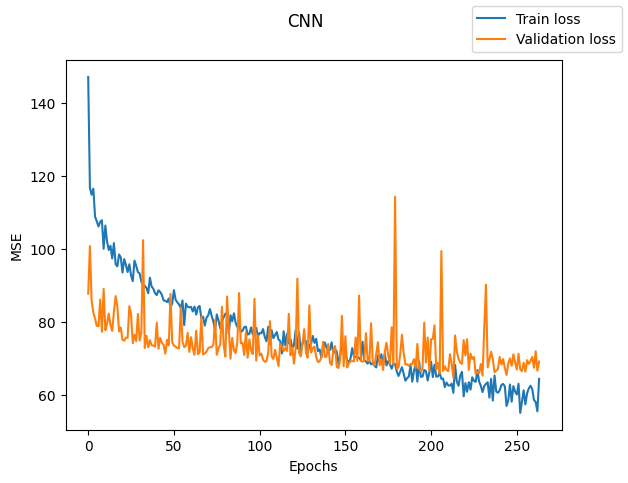

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(cnn_history.history['loss'], label='Train loss')
plt.plot(cnn_history.history['val_loss'], label='Validation loss')
fig.legend()
fig.suptitle('CNN')
plt.xlabel("Epochs")
plt.ylabel("MSE")

plt.show()

In [ ]:
Y_valid

array([7., 0., 1., ..., 0., 0., 0.])

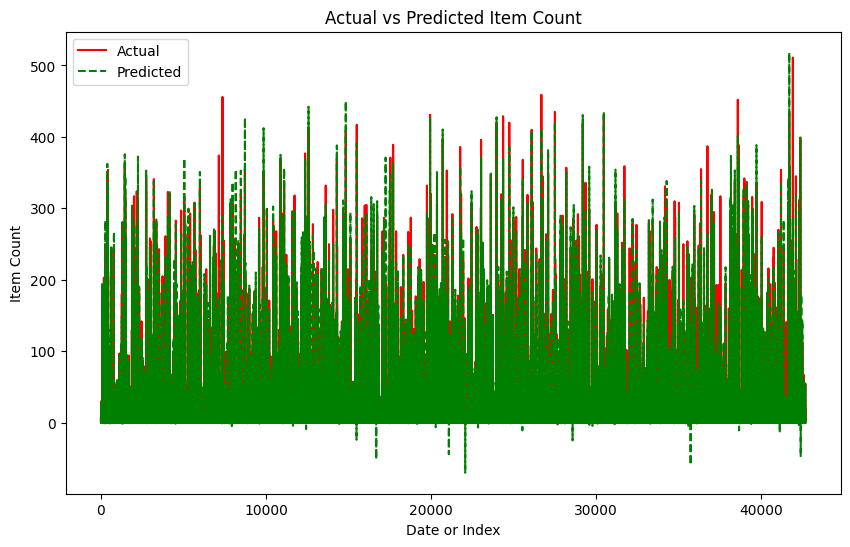

In [ ]:
import matplotlib.pyplot as plt

# Assuming `y_actual` and `y_pred` are your actual and predicted values
y_actual = Y_valid
y_pred = cnn_valid_pred  # Replace with your actual model predictions

# Create a figure
plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(y_actual, label='Actual', color='red')

# Plot predicted values
plt.plot(y_pred, label='Predicted', color='green', linestyle='--')

# Adding title and labels
plt.title("Actual vs Predicted Item Count")
plt.xlabel("Date or Index")
plt.ylabel("Item Count")

# Adding a legend
plt.legend()

# Show plot
plt.show()


# Using Seasonality Reduction

In [ ]:
!pip install statsmodels

In [ ]:
df_sales = pd.read_csv('/content/beach_demand_forecast/sales_train.csv')

In [ ]:
df_sales.date = pd.to_datetime(df_sales.date, errors='coerce')

In [ ]:
df_plot = df_sales[['date','item_count']].groupby(['date']).mean().reset_index()

In [ ]:
import plotly.express as px

In [ ]:
fig=px.line(df_plot,x='date',y='item_count',title='Total Sales by Date')
fig.show()

In [ ]:
from scipy import signal
df_plot['item_count']=signal.detrend(df_plot['item_count'])
fig=px.line(df_plot,x='date',y='item_count',title='Sales by Date')
fig.show()

In [ ]:
from scipy import signal

df_plot.item_count = signal.detrend(df_plot.item_count)

fig = px.line(df_plot, x="date", y="item_count", title='RAW Sales by Date')
fig.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [ ]:
df_plot = df_sales[['date','item_count']].groupby(['date']).mean()

In [ ]:
adjustment=seasonal_decompose(df_plot['item_count'],model='multiplicative')

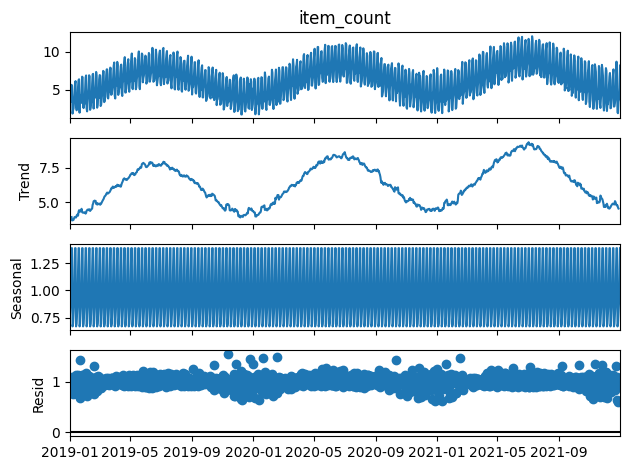

In [ ]:
adjustment.plot()
plt.show()

In [ ]:
adjustment.trend

,trend
date,
2019-01-01,NaN
2019-01-02,NaN
2019-01-03,NaN
2019-01-04,3.920000
2019-01-05,3.672857
...,...
2021-12-27,4.610000
2021-12-28,4.537143
2021-12-29,NaN


In [ ]:
adjustment.seasonal

,seasonal
date,
2019-01-01,0.787740
2019-01-02,0.884056
2019-01-03,1.186132
2019-01-04,1.390103
2019-01-05,1.389816
...,...
2021-12-27,0.693107
2021-12-28,0.787740
2021-12-29,0.884056


In [ ]:
df_plot2=df_plot.copy()
df_plot2['item_count']=df_plot2['item_count']/adjustment.trend/adjustment.seasonal

fig=px.line(df_plot2.reset_index(),x='date',y='item_count',title='Sales By Date')
fig.show()

In [ ]:
df_adjustment = pd.DataFrame(adjustment.seasonal)
df_adjustment['trend'] = adjustment.trend

df_adjustment

,seasonal,trend
date,,
2019-01-01,0.787740,NaN
2019-01-02,0.884056,NaN
2019-01-03,1.186132,NaN
2019-01-04,1.390103,3.920000
2019-01-05,1.389816,3.672857
...,...,...
2021-12-27,0.693107,4.610000
2021-12-28,0.787740,4.537143
2021-12-29,0.884056,NaN


In [ ]:
df_adjustment.to_pickle("adjustment.pkl")

In [ ]:
df_sales_adj=df_sales.merge(df_adjustment,right_index=True,left_on='date')
df_sales_adj.dropna(inplace=True)

In [ ]:
df_sales_adj['adjust'] = df_sales_adj.item_count / df_sales_adj.seasonal / df_sales_adj.trend

In [ ]:
df_sales_adj

,date,item_id,price,item_count,seasonal,trend,adjust
300,2019-01-04,3,29.22,6.0,1.390103,3.920000,1.101078
301,2019-01-04,4,26.42,18.0,1.390103,3.920000,3.303234
302,2019-01-04,12,4.87,6.0,1.390103,3.920000,1.101078
303,2019-01-04,13,4.18,11.0,1.390103,3.920000,2.018643
304,2019-01-04,16,3.21,211.0,1.390103,3.920000,38.721244
...,...,...,...,...,...,...,...
109295,2021-12-28,96,21.93,0.0,0.787740,4.537143,0.000000
109296,2021-12-28,97,28.65,0.0,0.787740,4.537143,0.000000
109297,2021-12-28,98,5.00,0.0,0.787740,4.537143,0.000000
109298,2021-12-28,99,5.32,0.0,0.787740,4.537143,0.000000


In [ ]:
SINGLE_YEAR=2020
df_sales_2020= df_sales_adj[df_sales['date'].dt.year==SINGLE_YEAR]
df_plot=df_sales_2020[['date','item_id','adjust']].groupby(['date','item_id']).mean().reset_index()
df_plot=df_plot.merge(df_items,left_on='item_id',right_on='id')[['date','adjust','name']]
fig=px.bar(df_plot,x='date',y='adjust',color='name',title=f'Item Sales by Date - {SINGLE_YEAR}')
fig.show()

<ipython-input-27-533e8fe7d2bc>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
def series_to_supervised(data, window=1, lag=1, dropnan=True):
    cols, names = list(), list()
    # Input sequence (t-n, ... t-1)
    for i in range(window, 0, -1):
        cols.append(data.shift(i))
        names += [('%s(t-%d)' % (col[0] if isinstance(col, tuple) else col, i)) for col in data.columns]  # Change here

    # current timestamp (t=0)
    cols.append(data)
    names += [('%s(t)' % (col[0] if isinstance(col, tuple) else col)) for col in data.columns]  # Change here

    # target timestamp (t=lag)
    cols.append(data.shift(-lag))
    names += [('%s(t+%d)' % (col[0] if isinstance(col, tuple) else col, lag)) for col in data.columns]  # Change here

    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names

    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
df_item2=df_items[['id','store_id']]
df_train= df_sales_adj.merge(df_item2,right_on='id',left_on='item_id').sort_values('date')
df_train=df_train.groupby(['item_id','store_id','date'],as_index=False)
df_train=df_train.agg({'adjust':['mean'],'item_count':['mean'],'seasonal':['mean'],'trend':['mean']})
df_train

,item_id,store_id,date,adjust,item_count,seasonal,trend
,,,,mean,mean,mean,mean
0,1,4,2019-01-04,0.0,0.0,1.390103,3.920000
1,1,4,2019-01-05,0.0,0.0,1.389816,3.672857
2,1,4,2019-01-06,0.0,0.0,0.669045,3.685714
3,1,4,2019-01-07,0.0,0.0,0.693107,3.695714
4,1,4,2019-01-08,0.0,0.0,0.787740,3.722857
...,...,...,...,...,...,...,...
108995,100,2,2021-12-24,0.0,0.0,1.390103,4.771429
108996,100,2,2021-12-25,0.0,0.0,1.389816,4.792857
108997,100,2,2021-12-26,0.0,0.0,0.669045,4.752857


In [ ]:
df_train['dow'] = df_train['date'].dt.dayofweek
df_train['doy'] = df_train['date'].dt.dayofyear
df_train

,item_id,store_id,date,adjust,item_count,seasonal,trend,dow,doy
,,,,mean,mean,mean,mean,,
0,1,4,2019-01-04,0.0,0.0,1.390103,3.920000,4,4
1,1,4,2019-01-05,0.0,0.0,1.389816,3.672857,5,5
2,1,4,2019-01-06,0.0,0.0,0.669045,3.685714,6,6
3,1,4,2019-01-07,0.0,0.0,0.693107,3.695714,0,7
4,1,4,2019-01-08,0.0,0.0,0.787740,3.722857,1,8
...,...,...,...,...,...,...,...,...,...
108995,100,2,2021-12-24,0.0,0.0,1.390103,4.771429,4,358
108996,100,2,2021-12-25,0.0,0.0,1.389816,4.792857,5,359
108997,100,2,2021-12-26,0.0,0.0,0.669045,4.752857,6,360


In [ ]:
window = 29
future_span = 30
series = series_to_supervised(df_train.drop('date', axis=1), window=window, lag=future_span)
series.head()

<ipython-input-31-4cb5f490eac1>:3: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



,item_id(t-29),store_id(t-29),adjust(t-29),item_count(t-29),seasonal(t-29),trend(t-29),dow(t-29),doy(t-29),item_id(t-28),store_id(t-28),...,dow(t),doy(t),item_id(t+30),store_id(t+30),adjust(t+30),item_count(t+30),seasonal(t+30),trend(t+30),dow(t+30),doy(t+30)
29,1.0,4.0,0.0,0.0,1.390103,3.920000,4.0,4.0,1.0,4.0,...,5,33,1.0,4.0,0.0,0.0,0.693107,4.892857,0.0,63.0
30,1.0,4.0,0.0,0.0,1.389816,3.672857,5.0,5.0,1.0,4.0,...,6,34,1.0,4.0,0.0,0.0,0.787740,4.971429,1.0,64.0
31,1.0,4.0,0.0,0.0,0.669045,3.685714,6.0,6.0,1.0,4.0,...,0,35,1.0,4.0,0.0,0.0,0.884056,5.044286,2.0,65.0
32,1.0,4.0,0.0,0.0,0.693107,3.695714,0.0,7.0,1.0,4.0,...,1,36,1.0,4.0,0.0,0.0,1.186132,5.117143,3.0,66.0
33,1.0,4.0,0.0,0.0,0.787740,3.722857,1.0,8.0,1.0,4.0,...,2,37,1.0,4.0,0.0,0.0,1.390103,5.184286,4.0,67.0


In [ ]:
series

,item_id(t-29),store_id(t-29),adjust(t-29),item_count(t-29),seasonal(t-29),trend(t-29),dow(t-29),doy(t-29),item_id(t-28),store_id(t-28),...,dow(t),doy(t),item_id(t+30),store_id(t+30),adjust(t+30),item_count(t+30),seasonal(t+30),trend(t+30),dow(t+30),doy(t+30)
29,1.0,4.0,0.0,0.0,1.390103,3.920000,4.0,4.0,1.0,4.0,...,5,33,1.0,4.0,0.0,0.0,0.693107,4.892857,0.0,63.0
30,1.0,4.0,0.0,0.0,1.389816,3.672857,5.0,5.0,1.0,4.0,...,6,34,1.0,4.0,0.0,0.0,0.787740,4.971429,1.0,64.0
31,1.0,4.0,0.0,0.0,0.669045,3.685714,6.0,6.0,1.0,4.0,...,0,35,1.0,4.0,0.0,0.0,0.884056,5.044286,2.0,65.0
32,1.0,4.0,0.0,0.0,0.693107,3.695714,0.0,7.0,1.0,4.0,...,1,36,1.0,4.0,0.0,0.0,1.186132,5.117143,3.0,66.0
33,1.0,4.0,0.0,0.0,0.787740,3.722857,1.0,8.0,1.0,4.0,...,2,37,1.0,4.0,0.0,0.0,1.390103,5.184286,4.0,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108965,100.0,2.0,0.0,0.0,0.787740,5.641429,1.0,299.0,100.0,2.0,...,2,328,100.0,2.0,0.0,0.0,1.390103,4.771429,4.0,358.0
108966,100.0,2.0,0.0,0.0,0.884056,5.664286,2.0,300.0,100.0,2.0,...,3,329,100.0,2.0,0.0,0.0,1.389816,4.792857,5.0,359.0
108967,100.0,2.0,0.0,0.0,1.186132,5.708571,3.0,301.0,100.0,2.0,...,4,330,100.0,2.0,0.0,0.0,0.669045,4.752857,6.0,360.0
108968,100.0,2.0,0.0,0.0,1.390103,5.608571,4.0,302.0,100.0,2.0,...,5,331,100.0,2.0,0.0,0.0,0.693107,4.610000,0.0,361.0


In [ ]:
last_item = 'item_id(t-%d)' % window
last_store = 'store_id(t-%d)' % window
last_dow = 'dow(t-%d)' % window
last_doy = 'doy(t-%d)' % window
series = series[(series['store_id(t)'] == series[last_store])]
series = series[(series['item_id(t)'] == series[last_item])]

In [ ]:
import numpy as np
from keras.utils import to_categorical

def drop_column(df, col):
  columns_to_drop = [('%s(t+%d)' % (col, future_span))]
  for i in range(window, 0, -1):
      columns_to_drop += [('%s(t-%d)' % (col, i))]
  df.drop(columns_to_drop, axis=1, inplace=True, errors='ignore')
  df.drop([f"{col}(t)"], axis=1, inplace=True, errors='ignore')

def cat_seq(df, col):
  return to_categorical(df[col].values)

In [ ]:
series.columns.values

array(['item_id(t-29)', 'store_id(t-29)', 'adjust(t-29)',
       'item_count(t-29)', 'seasonal(t-29)', 'trend(t-29)', 'dow(t-29)',
       'doy(t-29)', 'item_id(t-28)', 'store_id(t-28)', 'adjust(t-28)',
       'item_count(t-28)', 'seasonal(t-28)', 'trend(t-28)', 'dow(t-28)',
       'doy(t-28)', 'item_id(t-27)', 'store_id(t-27)', 'adjust(t-27)',
       'item_count(t-27)', 'seasonal(t-27)', 'trend(t-27)', 'dow(t-27)',
       'doy(t-27)', 'item_id(t-26)', 'store_id(t-26)', 'adjust(t-26)',
       'item_count(t-26)', 'seasonal(t-26)', 'trend(t-26)', 'dow(t-26)',
       'doy(t-26)', 'item_id(t-25)', 'store_id(t-25)', 'adjust(t-25)',
       'item_count(t-25)', 'seasonal(t-25)', 'trend(t-25)', 'dow(t-25)',
       'doy(t-25)', 'item_id(t-24)', 'store_id(t-24)', 'adjust(t-24)',
       'item_count(t-24)', 'seasonal(t-24)', 'trend(t-24)', 'dow(t-24)',
       'doy(t-24)', 'item_id(t-23)', 'store_id(t-23)', 'adjust(t-23)',
       'item_count(t-23)', 'seasonal(t-23)', 'trend(t-23)', 'dow(t-23)',
     

In [ ]:
labels=series['adjust(t+30)']
series.drop('adjust(t+30)', axis=1, inplace=True)

In [ ]:
series.drop('item_id(t+%d)' % future_span, axis=1, inplace=True)
series.drop('store_id(t+%d)' % future_span, axis=1, inplace=True)
series.drop('dow(t+%d)' % future_span, axis=1, inplace=True)
series.drop('doy(t+%d)' % future_span, axis=1, inplace=True)

In [ ]:
unadjusted_sales_col='item_count(t+%d)'%future_span
seasonal_col='seasonal(t+%d)'%future_span
trend_col='trend(t+%d)'%future_span
hold_sales = series[unadjusted_sales_col]
hold_seasonal = series[seasonal_col]
hold_trend = series[trend_col]

In [ ]:
series.drop('trend(t+%d)' % future_span, axis=1, inplace=True)
series.drop('seasonal(t+%d)' % future_span, axis=1, inplace=True)
series.drop('item_count(t+%d)' % future_span, axis=1, inplace=True)

In [ ]:
series.columns

Index(['item_id(t-29)', 'store_id(t-29)', 'adjust(t-29)', 'item_count(t-29)',
       'seasonal(t-29)', 'trend(t-29)', 'dow(t-29)', 'doy(t-29)',
       'item_id(t-28)', 'store_id(t-28)',
       ...
       'dow(t-1)', 'doy(t-1)', 'item_id(t)', 'store_id(t)', 'adjust(t)',
       'item_count(t)', 'seasonal(t)', 'trend(t)', 'dow(t)', 'doy(t)'],
      dtype='object', length=240)

In [ ]:
series.columns

Index(['item_id(t-29)', 'store_id(t-29)', 'adjust(t-29)', 'item_count(t-29)',
       'seasonal(t-29)', 'trend(t-29)', 'dow(t-29)', 'doy(t-29)',
       'item_id(t-28)', 'store_id(t-28)',
       ...
       'dow(t-1)', 'doy(t-1)', 'item_id(t)', 'store_id(t)', 'adjust(t)',
       'item_count(t)', 'seasonal(t)', 'trend(t)', 'dow(t)', 'doy(t)'],
      dtype='object', length=240)

In [ ]:
# Get sales sequences
series2 = series.copy()
drop_column(series2, "item_id")
drop_column(series2, "store_id")
drop_column(series2, "dow")
drop_column(series2, "doy")
sales_series = series2.values

In [ ]:
series2.columns

Index(['adjust(t-29)', 'item_count(t-29)', 'seasonal(t-29)', 'trend(t-29)',
       'adjust(t-28)', 'item_count(t-28)', 'seasonal(t-28)', 'trend(t-28)',
       'adjust(t-27)', 'item_count(t-27)',
       ...
       'seasonal(t-2)', 'trend(t-2)', 'adjust(t-1)', 'item_count(t-1)',
       'seasonal(t-1)', 'trend(t-1)', 'adjust(t)', 'item_count(t)',
       'seasonal(t)', 'trend(t)'],
      dtype='object', length=120)

In [ ]:
# Day of week as a categorical
series2 = series.copy()
drop_column(series2, "item_id")
drop_column(series2, "store_id")
drop_column(series2, "doy")
drop_column(series2, "adjust")
dow_series = series2.values

In [ ]:
series2.columns

Index(['item_count(t-29)', 'seasonal(t-29)', 'trend(t-29)', 'dow(t-29)',
       'item_count(t-28)', 'seasonal(t-28)', 'trend(t-28)', 'dow(t-28)',
       'item_count(t-27)', 'seasonal(t-27)',
       ...
       'trend(t-2)', 'dow(t-2)', 'item_count(t-1)', 'seasonal(t-1)',
       'trend(t-1)', 'dow(t-1)', 'item_count(t)', 'seasonal(t)', 'trend(t)',
       'dow(t)'],
      dtype='object', length=120)

In [ ]:
series2 = series.copy()
drop_column(series2, "item_id")
drop_column(series2, "store_id")
drop_column(series2, "dow")
drop_column(series2, "adjust")
doy_series = series2.values

In [ ]:

series2.columns

Index(['item_count(t-29)', 'seasonal(t-29)', 'trend(t-29)', 'doy(t-29)',
       'item_count(t-28)', 'seasonal(t-28)', 'trend(t-28)', 'doy(t-28)',
       'item_count(t-27)', 'seasonal(t-27)',
       ...
       'trend(t-2)', 'doy(t-2)', 'item_count(t-1)', 'seasonal(t-1)',
       'trend(t-1)', 'doy(t-1)', 'item_count(t)', 'seasonal(t)', 'trend(t)',
       'doy(t)'],
      dtype='object', length=120)

In [ ]:
t1 = sales_series.reshape(sales_series.shape + (1,))
t2 = dow_series.reshape(dow_series.shape + (1,))
t3 = doy_series.reshape(doy_series.shape + (1,))
x = np.concatenate([t1,t2,t3],axis=2)

In [ ]:
x.shape

(106070, 120, 3)

In [ ]:

print(t1.shape)
print(t2.shape)
print(t3.shape)

(106070, 120, 1)
(106070, 120, 1)
(106070, 120, 1)


In [ ]:
from sklearn.model_selection import train_test_split
data=np.arange(len(x))
y=labels.values
np.random.shuffle(data)
split_pt=int(len(data)*0.2)
X_valid=x[data[:split_pt]]
X_train=x[data[split_pt:]]
Y_valid=y[data[:split_pt]]
Y_train=y[data[split_pt:]]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train_flattened = X_train.reshape(-1, X_train.shape[-1])
X_valid_flattened = X_valid.reshape(-1, X_valid.shape[-1])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flattened)
X_valid_scaled = scaler.transform(X_valid_flattened)

X_train = X_train_scaled.reshape(X_train.shape)
X_valid = X_valid_scaled.reshape(X_valid.shape)

In [ ]:
y_train_actual = hold_sales.iloc[data[split_pt:]]
y_valid_actual = hold_sales.iloc[data[:split_pt]]

y_train_seasonal = hold_seasonal.iloc[data[split_pt:]]
y_valid_seasonal = hold_seasonal.iloc[data[:split_pt]]

y_train_trend = hold_trend.iloc[data[split_pt:]]
y_valid_trend = hold_trend.iloc[data[:split_pt]]

In [ ]:
# Display results
print('Train set shape', X_train.shape)
print('Validation set shape', X_valid.shape)

Train set shape (84856, 120, 3)
Validation set shape (21214, 120, 3)


In [ ]:
print('Train set shape', X_train.shape)
print('Validation set shape', Y_valid.shape)

Train set shape (84856, 120, 3)
Validation set shape (21214,)


In [ ]:
# ['item_id', 'item_count', 'store_id', 'adjust' ,'seasonal' 'trend', 'dow', 'doy']
#  these are 8 columns , feature engineered for 29 past and 1 current date

# X features:
# t1:[ 'item_count','seasonal','trend','adjust']:past 30 days
# t2:[ 'item_count' ,'seasonal' 'trend', 'doy']:past 30 days
# t3:[ 'item_count' ,'seasonal' 'trend', 'dow']:past 30 days
# X_final: overlap(t1,t2,t3)
# final shape: ((109000,120)+(,1) )* 3= (109000,120,3)
# train_test_split : 80:20
# to be predicted y_adjusted:['adjust','seasonal','trend','item_count']
# to be predicted y_seasonal:['adjust','seasonal','trend','item_count']
# to be predicted y_trend:['adjust','seasonal','trend','item_count']
# to be predicted y_actual(item_count):['adjust','seasonal','trend','item_count']

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential,Model
from keras.layers import Conv1D,MaxPooling1D
from keras.layers import Dense,LSTM,Flatten,RepeatVector,TimeDistributed,Flatten,Dropout
import keras

In [ ]:
epochs=500
batch=256
lr=0.0003
opt=tf.keras.optimizers.Adam(lr)

In [ ]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=8, activation='relu',input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002), loss='mse', metrics=['mae'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [61]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='', factor=0.2, patience=5, min_lr=1e-6)

history = model.fit(
        X_train, Y_train,
        validation_data=(X_valid, Y_valid),
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping, lr_scheduler],
        verbose=2
    )

Epoch 1/100
2652/2652 - 34s - 13ms/step - loss: 5.1855 - mae: 0.4728 - val_loss: 2.3129 - val_mae: 0.2865 - learning_rate: 2.0000e-04
Epoch 2/100
2652/2652 - 26s - 10ms/step - loss: 2.5189 - mae: 0.3414 - val_loss: 2.1915 - val_mae: 0.2959 - learning_rate: 2.0000e-04
Epoch 3/100
2652/2652 - 21s - 8ms/step - loss: 2.3432 - mae: 0.3287 - val_loss: 2.2270 - val_mae: 0.2970 - learning_rate: 2.0000e-04
Epoch 4/100
2652/2652 - 18s - 7ms/step - loss: 2.2745 - mae: 0.3198 - val_loss: 2.1634 - val_mae: 0.2611 - learning_rate: 2.0000e-04
Epoch 5/100
2652/2652 - 21s - 8ms/step - loss: 2.3325 - mae: 0.3199 - val_loss: 2.1286 - val_mae: 0.2693 - learning_rate: 2.0000e-04
Epoch 6/100
2652/2652 - 19s - 7ms/step - loss: 2.2232 - mae: 0.3113 - val_loss: 2.5633 - val_mae: 0.3140 - learning_rate: 2.0000e-04
Epoch 7/100
2652/2652 - 16s - 6ms/step - loss: 2.1900 - mae: 0.3097 - val_loss: 2.0948 - val_mae: 0.3587 - learning_rate: 2.0000e-04
Epoch 8/100
2652/2652 - 22s - 8ms/step - loss: 2.2449 - mae: 0.3130

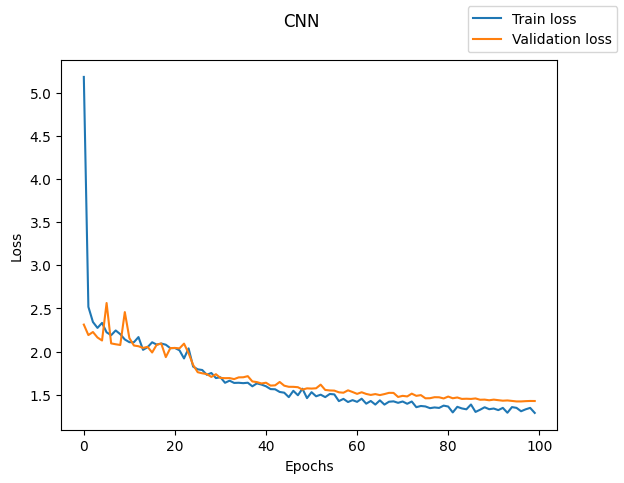

In [65]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
fig.legend()
fig.suptitle('CNN')
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.show()

In [66]:
from sklearn.metrics import mean_squared_error
import numpy as np

cnn_train_pred = model.predict(X_train)
cnn_valid_pred = model.predict(X_valid)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, cnn_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, cnn_valid_pred)))

2652/2652 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Train rmse: 1.0143286219526038
Validation rmse: 1.1923876618584066


In [69]:
cnn_train_pred2 = cnn_train_pred.flatten() * y_train_seasonal * y_train_trend
cnn_valid_pred2 = cnn_valid_pred.flatten() * y_valid_seasonal * y_valid_trend

print('Train rmse:', np.sqrt(mean_squared_error(y_train_actual, cnn_train_pred2)))
print('Validation rmse:', np.sqrt(mean_squared_error(y_valid_actual, cnn_valid_pred2)))

Train rmse: 6.604560554869507
Validation rmse: 8.164187663235689


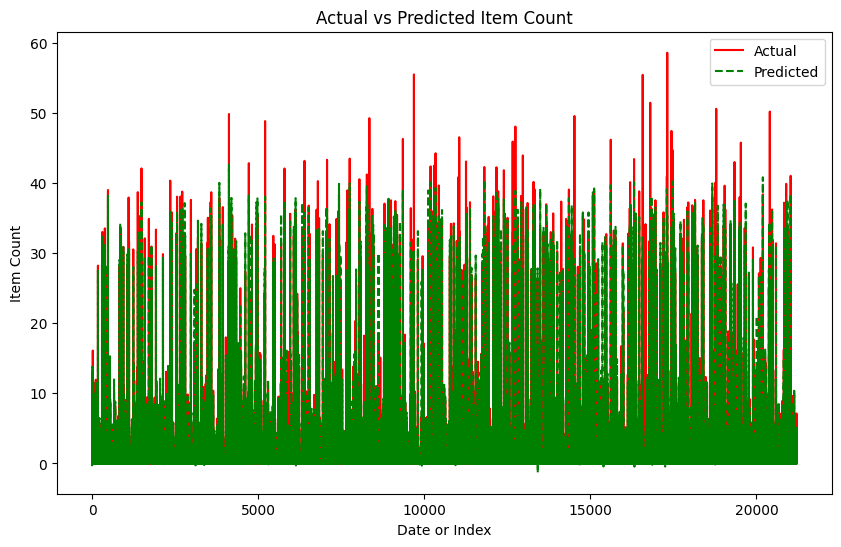

In [70]:
import matplotlib.pyplot as plt

# Assuming `y_actual` and `y_pred` are your actual and predicted values
y_actual = Y_valid
y_pred = cnn_valid_pred  # Replace with your actual model predictions

# Create a figure
plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(y_actual, label='Actual', color='red')

# Plot predicted values
plt.plot(y_pred, label='Predicted', color='green', linestyle='--')

# Adding title and labels
plt.title("Actual vs Predicted Item Count")
plt.xlabel("Date or Index")
plt.ylabel("Item Count")

# Adding a legend
plt.legend()

# Show plot
plt.show()
